## House Prices - Advanced Regression Techniques
This Kaggle competition focuses on forecasting (predicting) the future house prices with a given dataset.

## 1. Problem Definition
in a statement:
`It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.`

## 2. Data
Data was collected from Kaggle competition: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

## 3. Evaluation
`Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)`

## 4. Features 
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.shape

(1460, 81)

In [7]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<Axes: ylabel='Frequency'>

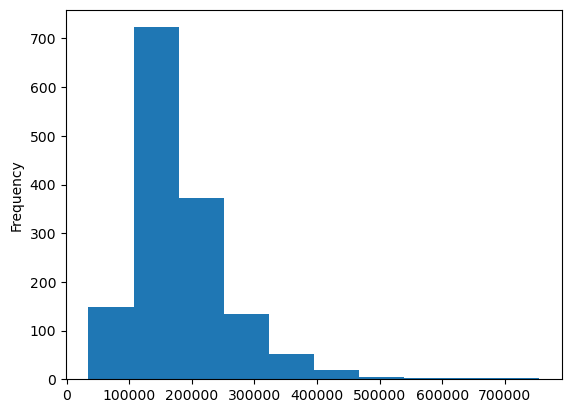

In [8]:
df.SalePrice.plot.hist()

In [9]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content) or pd.api.types.is_object_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [13]:
for label, content in df.items():
    if pd.api.types.is_int64_dtype(content) or pd.api.types.is_numeric_dtype(content):
        print(label)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


C:\Users\pwrxn\AppData\Local\Temp\ipykernel_16412\2048949423.py:2: DeprecationWarning: is_int64_dtype is deprecated and will be removed in a future version. Use dtype == np.int64 instead.
  if pd.api.types.is_int64_dtype(content) or pd.api.types.is_numeric_dtype(content):


In [11]:
df['GarageArea'].dtype

dtype('int64')

In [15]:
df['YrSold'].dtype

dtype('int64')

In [20]:
df_tmp = df.copy()

In [21]:
df_tmp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
# Correcting the DataFrame name and using square brackets
df_tmp['YrSold'] = df_tmp['YrSold'].astype(str)
df_tmp['MoSold'] = df_tmp['MoSold'].astype(str)

# Padding month column with zeros
df_tmp['MoSold'] = df_tmp['MoSold'].str.zfill(2)

# Combining year and month columns, assuming the day is the first of the month
df_tmp['SaleDate'] = df_tmp['YrSold'] + '-' + df_tmp['MoSold'] + '-01'

# Converting to datetime
df_tmp['SaleDate'] = pd.to_datetime(df_tmp['SaleDate'])

# Check the first few rows
print(df_tmp.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0     02   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0     05   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0     09   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0     02   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice   SaleDate  
0       WD         Normal     

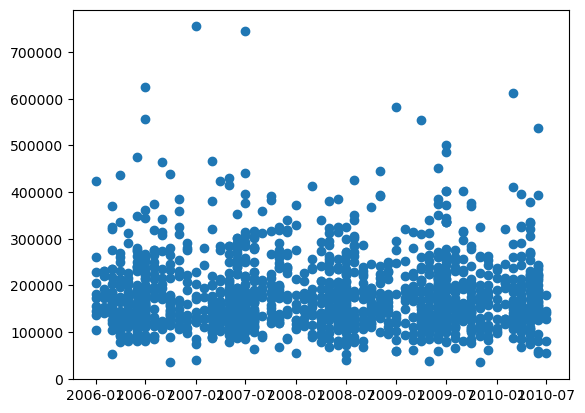

In [23]:
fig, ax = plt.subplots()
ax.scatter(df_tmp['SaleDate'], df_tmp['SalePrice']);

In [24]:
df_tmp.sort_values(by=['SaleDate'], inplace=True, ascending=True)
df_tmp.SaleDate.head(20)

810    2006-01-01
996    2006-01-01
664    2006-01-01
302    2006-01-01
141    2006-01-01
411    2006-01-01
169    2006-01-01
1040   2006-01-01
370    2006-01-01
1404   2006-01-01
545    2006-02-01
222    2006-02-01
602    2006-02-01
255    2006-02-01
1167   2006-02-01
948    2006-02-01
892    2006-02-01
3      2006-02-01
1033   2006-02-01
1246   2006-03-01
Name: SaleDate, dtype: datetime64[ns]

In [27]:
df_tmp.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
SaleDate           0
Length: 82, dtype: int64

In [32]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 810 to 419
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             1460 non-null   int64         
 1   MSSubClass     1460 non-null   int64         
 2   MSZoning       1460 non-null   category      
 3   LotFrontage    1201 non-null   float64       
 4   LotArea        1460 non-null   int64         
 5   Street         1460 non-null   category      
 6   Alley          91 non-null     category      
 7   LotShape       1460 non-null   category      
 8   LandContour    1460 non-null   category      
 9   Utilities      1460 non-null   category      
 10  LotConfig      1460 non-null   category      
 11  LandSlope      1460 non-null   category      
 12  Neighborhood   1460 non-null   category      
 13  Condition1     1460 non-null   category      
 14  Condition2     1460 non-null   category      
 15  BldgType       1460 non-n

## Spliting data into train validation set

In [75]:
def preprocessed_data(df):
    '''
    Performs transformations on df and returns transformed df.
    '''
    #Fill numeric rows
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label + '_is_missing'] = pd.isnull(content)
                df[label] = content.fillna(content.median())

    # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content) and label != 'YrSold':
            df[label+'_is_missing'] = pd.isnull(content)
    # We add +1 to the category cuz pandas encodes missing val as -1
            df[label] = pd.Categorical(content).codes+1

    return df

In [76]:
df = preprocessed_data(df)

In [77]:
df_val = df[df.YrSold == 2010]
df_train = df[df.YrSold != 2010]

len(df_val), len(df_train)

(175, 1285)

In [80]:
%%time

model = RandomForestRegressor(n_jobs=-1, random_state=42)

model.fit(df.drop('SalePrice', axis=1), df_tmp['SalePrice'])

CPU times: total: 9.81 s
Wall time: 841 ms


RandomForestRegressor(n_jobs=-1, random_state=42)

In [81]:
model.score(df.drop('SalePrice', axis=1), df['SalePrice'])

-0.36389833885431866

In [82]:
df.isna().sum()

Id                          0
MSSubClass                  0
MSZoning                    0
LotFrontage                 0
LotArea                     0
                           ..
PoolQC_is_missing           0
Fence_is_missing            0
MiscFeature_is_missing      0
SaleType_is_missing         0
SaleCondition_is_missing    0
Length: 127, dtype: int64

In [83]:
%%time

model = RandomForestClassifier(n_jobs=-1, random_state=42)

model.fit(df.drop('SalePrice', axis=1), df['SalePrice'])


CPU times: total: 4.47 s
Wall time: 640 ms


RandomForestClassifier(n_jobs=-1, random_state=42)

In [84]:
model.score(df.drop('SalePrice', axis=1), df['SalePrice'])

1.0

In [86]:
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1285, 126), (1285,), (175, 126), (175,))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

scaler = StandardScaler()


In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def rmse(y_test, y_preds):
    '''
    Calcualte root mean squared error between labels and predictions.
    '''
    return np.sqrt(mean_squared_error(y_test, y_preds))

def show_scores (model):
    '''
    shows table scores of follwing metrics: R^2, MAE, MSE, RMSE
    '''
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'R2 score' : r2_score(y_train, train_preds), 
              'Valid R2 Score' : r2_score(y_valid, val_preds),
              'RMSE' : np.sqrt(mean_squared_error(y_train, train_preds)),
              'Valid RMSE' : np.sqrt(mean_squared_error(y_valid, val_preds)),
              'MAE' : mean_absolute_error(y_train, train_preds),
              'Valid MAE' : mean_absolute_error(y_valid, val_preds)}
    return scores

In [104]:
model = RandomForestRegressor(n_jobs=-1, random_state=42)

In [105]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [106]:
show_scores(model)

{'R2 score': 0.9783299887345713,
 'Valid R2 Score': 0.8992055590522172,
 'RMSE': 11672.481881275366,
 'Valid RMSE': 25468.704155720738,
 'MAE': 6707.933999999999,
 'Valid MAE': 16158.455599999998}

In [110]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {'n_estimators': np.arange(10,100,10),
           'max_depth': [None, 3,5,10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2),
           'max_features': [0.5, 1],
           'max_samples': [1028]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                              param_distributions=rf_grid,
                              n_iter=5,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1],
                                        'max_samples': [1028],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [111]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_samples': 1028,
 'max_features': 0.5,
 'max_depth': None}

In [112]:
show_scores(rs_model)

{'R2 score': 0.8916561173980064,
 'Valid R2 Score': 0.8702107526936912,
 'RMSE': 26099.71934723849,
 'Valid RMSE': 28900.6702880019,
 'MAE': 14654.920127844103,
 'Valid MAE': 17606.550036494762}

In [113]:
best_model = RandomForestRegressor(n_estimators=80,
                                   min_samples_split=2,
                                   min_samples_leaf=9,
                                   max_samples=1028,
                                   max_features=0.5,
                                   max_depth=None)
best_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, max_samples=1028, min_samples_leaf=9,
                      n_estimators=80)

In [114]:
show_scores(best_model)

{'R2 score': 0.8900138765677956,
 'Valid R2 Score': 0.8700357638520292,
 'RMSE': 26296.78087515669,
 'Valid RMSE': 28920.14644431241,
 'MAE': 14665.362549962927,
 'Valid MAE': 17869.04408883874}

## Make predictions on test data

In [115]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [116]:
df_test = preprocessed_data(df_test)
df_test.head()

C:\Users\pwrxn\AppData\Local\Temp\ipykernel_16412\3560944005.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label+'_is_missing'] = pd.isnull(content)
C:\Users\pwrxn\AppData\Local\Temp\ipykernel_16412\3560944005.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label+'_is_missing'] = pd.isnull(content)
C:\Users\pwrxn\AppData\Local\Temp\ipykernel_16412\3560944005.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  C

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageCars_is_missing,GarageArea_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1461,20,3,80.0,11622,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1,1462,20,4,81.0,14267,2,0,1,4,1,...,False,False,False,False,False,True,True,False,False,False
2,1463,60,4,74.0,13830,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
3,1464,60,4,78.0,9978,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,1465,120,4,43.0,5005,2,0,1,2,1,...,False,False,False,False,False,True,True,True,False,False


In [117]:
set(X_train.columns) - set(df_test.columns)

set()

In [118]:
# Ensure df_test has the same columns as X_train
for column in X_train.columns:
    if column not in df_test.columns:
        df_test[column] = 0  # Or another default value as appropriate

# Reorder df_test columns to match X_train
df_test = df_test[X_train.columns]

test_preds = best_model.predict(df_test)

In [119]:
test_preds

array([121655.57214572, 150331.91501874, 179154.43122637, ...,
       156714.64730037, 115976.44108929, 226678.32705908])

In [124]:
df_preds = pd.DataFrame()
df_preds['Id'] = df_test['Id']
df_preds['SalePrice'] = test_preds
df_preds

,Id,SalePrice
0,1461,121655.572146
1,1462,150331.915019
2,1463,179154.431226
3,1464,183075.017121
4,1465,207341.529473
...,...,...
1454,2915,90571.813200
1455,2916,95324.388829
1456,2917,156714.647300
1457,2918,115976.441089


In [125]:
df_preds.to_csv('House_Prices_predictions_Kaggle.csv', index=False)

## Feature importance

In [126]:
best_model.feature_importances_

array([9.52420246e-04, 1.87415907e-03, 1.11902992e-03, 3.07969514e-03,
       1.51548348e-02, 0.00000000e+00, 0.00000000e+00, 1.13274019e-03,
       6.13245485e-05, 0.00000000e+00, 1.20751445e-04, 0.00000000e+00,
       2.36875616e-03, 0.00000000e+00, 0.00000000e+00, 5.10748288e-04,
       1.49311924e-03, 4.65112403e-01, 2.26280677e-03, 4.53456341e-02,
       9.46351343e-03, 1.24899227e-04, 0.00000000e+00, 7.13522901e-04,
       4.18979416e-04, 3.79142134e-04, 1.87767337e-03, 2.18888251e-02,
       4.49496032e-05, 2.69638125e-05, 7.53255593e-03, 9.02969511e-05,
       1.04877331e-03, 8.91927130e-04, 1.90899936e-02, 2.61968910e-05,
       2.77975923e-05, 2.61352771e-03, 4.45704850e-02, 0.00000000e+00,
       5.69917899e-04, 1.61293755e-03, 2.89905397e-05, 3.07541311e-02,
       7.23727449e-03, 0.00000000e+00, 1.38803967e-01, 1.86719327e-03,
       0.00000000e+00, 1.96824681e-02, 1.23007920e-03, 5.80406222e-04,
       7.09091128e-04, 8.67028616e-03, 6.53641060e-03, 0.00000000e+00,
      

In [127]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,
                        'feature_importances': importances})
          .sort_values('feature_importances', ascending=False)
          .reset_index(drop=True))

    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature importance')
    ax.invert_yaxis()

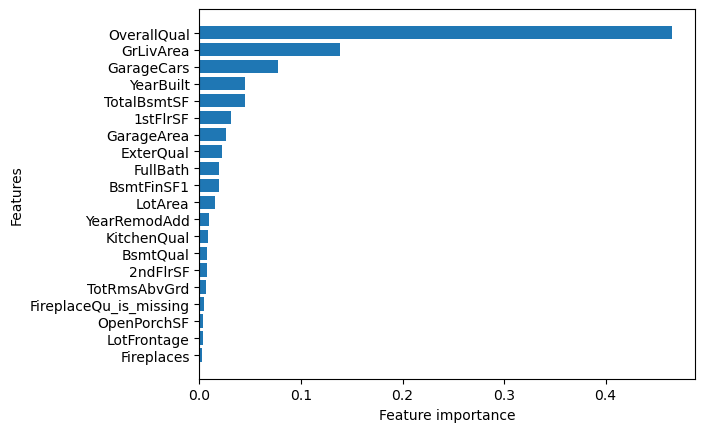

In [128]:
plot_features(X_train.columns, best_model.feature_importances_)